In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [60]:
df = pd.read_csv(r"D:\Machinelearning\data\ford.csv")
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [61]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [62]:
df = df.rename(columns= {'mileage':"total travel","mpg":'mileage'})

In [63]:
df.shape

(17966, 9)

In [64]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
total travel    0
fuelType        0
tax             0
mileage         0
engineSize      0
dtype: int64

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   total travel  17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mileage       17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [66]:
def value_counts_all(df):
    for col in df.columns:
        print(f"\n🔹 Value counts for column: '{col}'")
        print(df[col].value_counts())
    return print(df[col].value_counts())

In [67]:
value_counts_all(df)


🔹 Value counts for column: 'model'
model
 Fiesta                   6557
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Focus                        1
Name: count, dtype: int64

🔹 Value counts for column: 'year'
year
2017    4888
2018    4014
2019    3194
2016    2331
2015    1368
2014     805
2013     609
2020     258
2012     115
2011      94
2009      91
2010 

In [68]:
def plotting(var,num):
    plt.subplot(2,2,num)
    sns.histplot(df[var],kde= True)
    

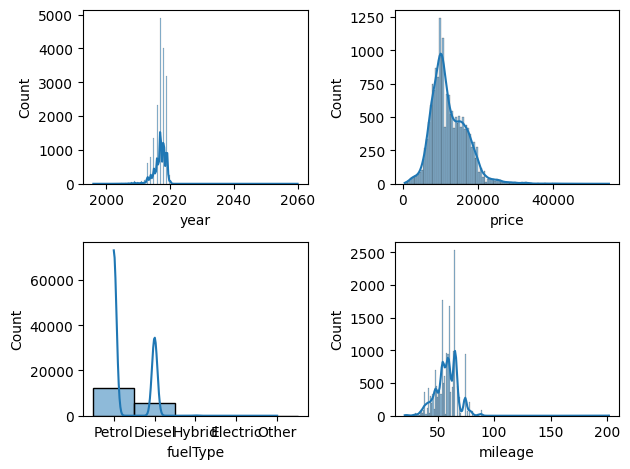

In [69]:
plotting("year",1)
plotting("price",2)
plotting("fuelType",3)
plotting("mileage",4)
plt.tight_layout()

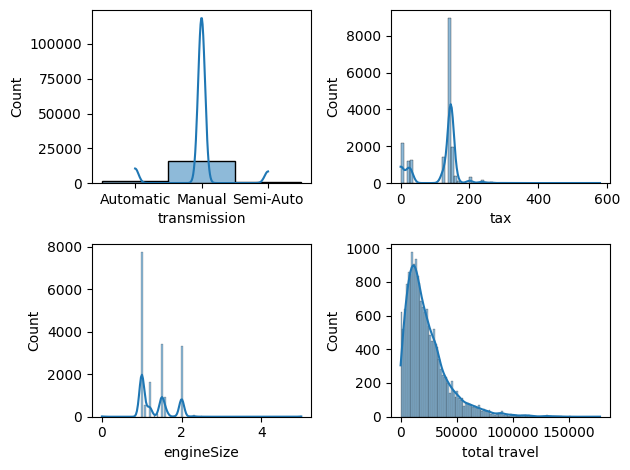

In [71]:
plotting('transmission',1)
plotting('tax',2)
plotting('engineSize',3)
plotting("total travel",4)
plt.tight_layout()

engine_group  tax    
Small         2004952    1
Medium        21065      1
Large         10060      1
Name: count, dtype: int64


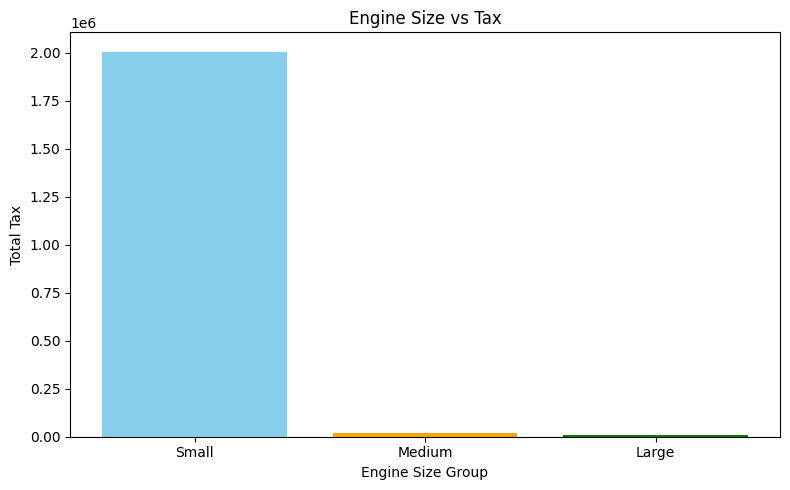

In [81]:

bins = [0, 2, 4, 5]
labels = ['Small', 'Medium', 'Large']
df['engine_group'] = pd.cut(df['engineSize'], bins=bins, labels=labels, include_lowest=True)


size_VS_Tax = df.groupby('engine_group')['tax'].sum().reset_index()
print(size_VS_Tax.value_counts())
# Plotting
plt.figure(figsize=(8, 5))
plt.bar(size_VS_Tax['engine_group'], size_VS_Tax['tax'], color=['skyblue', 'orange', 'green'])
plt.title("Engine Size vs Tax")
plt.xlabel("Engine Size Group")
plt.ylabel("Total Tax")
plt.tight_layout()
plt.show()


engine_group  price    
Small         216509710    1
Medium        2530862      1
Large         1573551      1
Name: count, dtype: int64


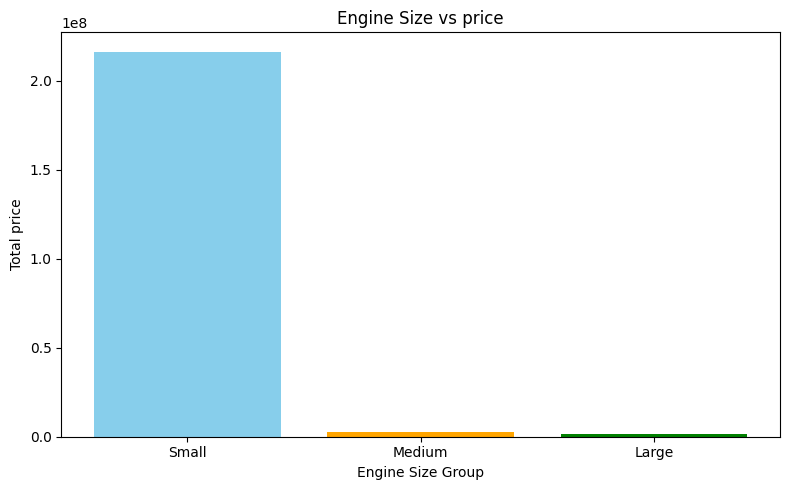

In [83]:
size_VS_price = df.groupby('engine_group')['price'].sum().reset_index()
print(size_VS_price.value_counts())
# Plotting
plt.figure(figsize=(8, 5))
plt.bar(size_VS_price['engine_group'], size_VS_price['price'], color=['skyblue', 'orange', 'green'])
plt.title("Engine Size vs price")
plt.xlabel("Engine Size Group")
plt.ylabel("Total price")
plt.tight_layout()
plt.show()


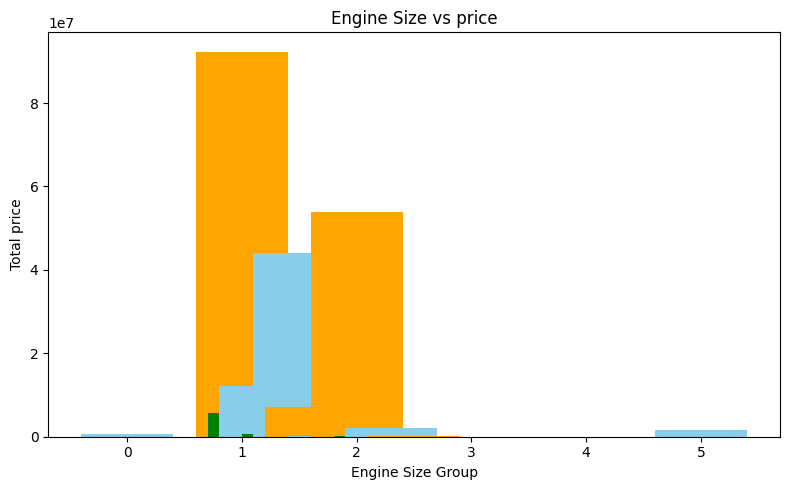

In [86]:
sizevs_price = df.groupby("engineSize")["price"].sum().reset_index()
plt.figure(figsize=(8,5))
plt.bar(sizevs_price["engineSize"],sizevs_price["price"], color=['skyblue', 'orange', 'green'])
plt.title("Engine Size vs price")
plt.xlabel("Engine Size Group")
plt.ylabel("Total price")
plt.tight_layout()
plt.show()
